In [771]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [772]:
# Importing the dataset
data = pd.read_excel('flightdata.xlsx')

In [773]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [774]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [775]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [776]:
data.dropna(inplace=True)

In [777]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [778]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [779]:
# Using pandas to_datetime to convert object data type to datetime dtype
def change_into_datetime(col):
    data[col] = pd.to_datetime(data[col])

In [780]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [781]:
for i in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [782]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [783]:
data['Journey_day'] = data['Date_of_Journey'].dt.day
data['Journey_month'] = data['Date_of_Journey'].dt.month

In [784]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-10-19 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-10-19 05:50:00,2021-10-19 13:15:00,7h 25m,2 stops,No info,7662,5,1


In [785]:
# Dropping the unwanted column
data.drop('Date_of_Journey', axis=1, inplace=True)

In [786]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-10-19 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-10-19 05:50:00,2021-10-19 13:15:00,7h 25m,2 stops,No info,7662,5,1


In [787]:
def extract_hour(df, col):
    df[col+"_hour"] = df[col].dt.hour

In [788]:
def extract_min(df, col):
    df[col+"_minute"] = df[col].dt.minute

In [789]:
def drop_column(df, col):
    df.drop(col, axis=1, inplace=True)

In [790]:
# Similar to Date_of_Journey we can extract values from Dep_Time
# Extracting Hours
extract_hour(data, 'Dep_Time')

# Extracting Minutes
extract_min(data, 'Dep_Time')

# Now we can drop Dep_Time as it is of no use
drop_column(data, 'Dep_Time')

In [791]:
data.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-10-19 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50


In [792]:
# Similar to Date_of_Journey we can extract values from Arrival_Time
# Extracting Hours
extract_hour(data, 'Arrival_Time')

# Extracting minutes
extract_min(data, 'Arrival_Time')

# Now we can drop Arrival_Time as it is of no use
drop_column(data, 'Arrival_Time')

In [793]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15


In [794]:
# Pre-processing on duration column and Separating hours and minute from duration
duration = list(data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split(' ')) == 2:
        pass
    else:
        if 'h' in duration[i]:                   # Check if duration contains only hour
            duration[i] = duration[i] + ' 0m'      # Adds 0 minute
        else:
            # if duration contains only second, Adds 0 hour
            duration[i] = '0h ' + duration[i]

In [795]:
data['Duration'] = duration

In [796]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15


In [797]:
def hour(x):
    return x.split(' ')[0][0:-1]

In [798]:
def min(x):
    return x.split(' ')[1][0:-1]

In [799]:
data['Duration_hours'] = data['Duration'].apply(hour)
data['Duration_mins'] = data['Duration'].apply(min)

In [800]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25


In [801]:
# Dropping the unwanted column
data.drop('Duration', axis=1, inplace=True)

In [802]:
data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25


In [803]:
data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours         object
Duration_mins          object
dtype: object

In [804]:
# Changing the data type
data['Duration_hours'] = data['Duration_hours'].astype(int)
data['Duration_mins'] = data['Duration_mins'].astype(int)

In [805]:
data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours          int32
Duration_mins           int32
dtype: object

In [806]:
data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25


In [807]:
# Data split as catergorical data
cat_col = [col for col in data.columns if data[col].dtype == 'O']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [808]:
#Data split as continous data
cont_col=[col for col in data.columns if data[col].dtype!='O']
cont_col

['Price',
 'Journey_day',
 'Journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins']

In [809]:
# Handling categorical data
categorical = data[cat_col]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [810]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

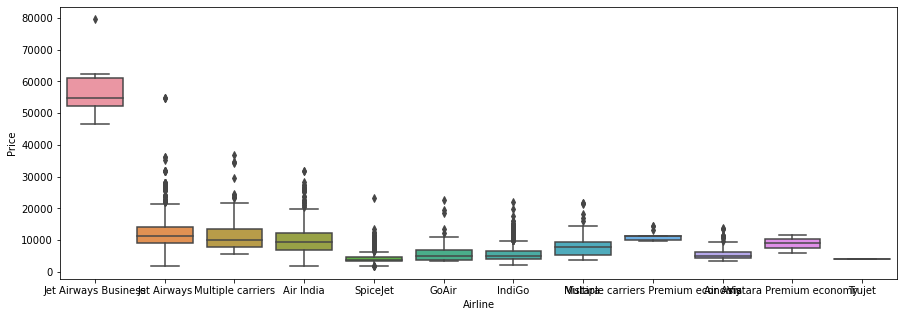

In [811]:
plt.figure(figsize=(15, 5))
sns.boxplot(y='Price', x='Airline',
            data=data.sort_values('Price', ascending=False))

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

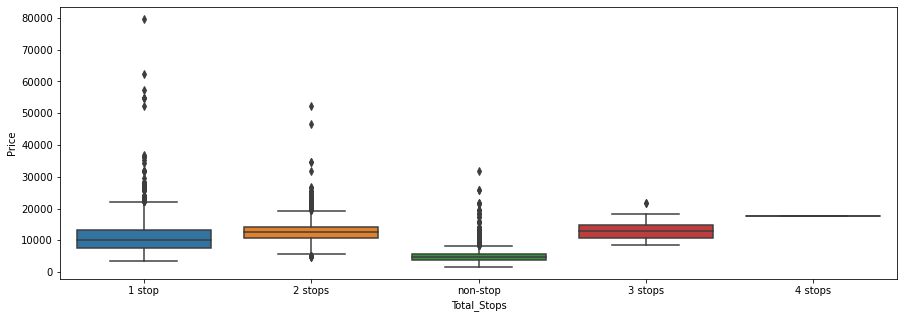

In [812]:
plt.figure(figsize=(15, 5))
sns.boxplot(y='Price', x='Total_Stops',
            data=data.sort_values('Price', ascending=False))

In [813]:
len(categorical['Airline'].unique())

12

In [814]:
# OneHotEncoding to convert 'Airline' as dtype strings to numerical
Airline = pd.get_dummies(categorical['Airline'], drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [815]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<Figure size 1080x360 with 0 Axes>

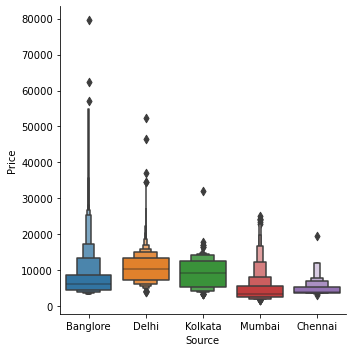

In [816]:
# Source vs Price
plt.figure(figsize=(15, 5))
sns.catplot(y='Price', x='Source', data=data.sort_values(
    'Price', ascending=False), kind='boxen')

In [817]:
# OneHotEncoding to convert 'Source' as dtype strings to numerical

Source = pd.get_dummies(categorical['Source'], drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [818]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [819]:
# OneHotEncoding to convert 'Destination' as dtype strings to numerical

Destination = pd.get_dummies(categorical['Destination'], drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [820]:
categorical['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [821]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

categorical['Route_1'] = categorical['Route'].str.split('→').str[0]
categorical['Route_2'] = categorical['Route'].str.split('→').str[1]
categorical['Route_3'] = categorical['Route'].str.split('→').str[2]
categorical['Route_4'] = categorical['Route'].str.split('→').str[3]
categorical['Route_5'] = categorical['Route'].str.split('→').str[4]

In [823]:
categorical.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN


In [825]:
categorical['Route_1'].fillna('None', inplace=True)
categorical['Route_2'].fillna('None', inplace=True)
categorical['Route_3'].fillna('None', inplace=True)
categorical['Route_4'].fillna('None', inplace=True)
categorical['Route_5'].fillna('None', inplace=True)

In [826]:
# Finding the categories in each cat_feature
for feature in categorical.columns:
    print('{} has total {} categories \n'.format(
        feature, len(categorical[feature].value_counts())))

Airline has total 12 categories 

Source has total 5 categories 

Destination has total 6 categories 

Route has total 128 categories 

Total_Stops has total 5 categories 

Additional_Info has total 10 categories 

Route_1 has total 5 categories 

Route_2 has total 45 categories 

Route_3 has total 30 categories 

Route_4 has total 14 categories 

Route_5 has total 6 categories 



In [827]:
# Since a lot of features are in 'Route', we can apply label encoding
encoder = LabelEncoder()

In [828]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5'],
      dtype='object')

In [829]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
    categorical[i] = encoder.fit_transform(categorical[i])

In [830]:
categorical.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,2,25,1,3,5


In [831]:
# Additional_Info contains almost 80% NaN,so we can drop the column
# We can also drop 'Route' as well since it is already preprocessed

drop_column(categorical, 'Route')
drop_column(categorical, 'Additional_Info')

In [832]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,0,34,8,13,5


In [833]:
categorical['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [834]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [835]:
# We perform LabelEncoder on 'Total_stops'

dict = {'non-stop': 0, '2 stops': 2, '1 stop': 1, '3 stops': 3, '4 stops': 4}

In [836]:
categorical['Total_Stops'] = categorical['Total_Stops'].map(dict)

In [837]:
categorical.head(2)

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5


In [838]:
data[cont_col]

,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,3897,24,3,22,20,1,10,2,50
1,7662,5,1,5,50,13,15,7,25
2,13882,6,9,9,25,4,25,19,0
3,6218,5,12,18,5,23,30,5,25
4,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...
10678,4107,4,9,19,55,22,25,2,30
10679,4145,27,4,20,45,23,20,2,35
10680,7229,27,4,8,20,11,20,3,0
10681,12648,3,1,11,30,14,10,2,40


In [839]:
# Concaltionating the categorical data and the continous data

train = pd.concat([categorical, Airline, Source,
                  Destination, data[cont_col]], axis=1)
train.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,...,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [840]:
drop_column(train, 'Airline')
drop_column(train, 'Source')
drop_column(train, 'Destination')

In [870]:
pd.set_option('display.max_columns', 35)
train.head(2)

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,...,Mumbai,Cochin,Delhi,Delhi,Hyderabad,Kolkata,Kolkata,New Delhi,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Price
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50,3897.0
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,5,1,5,50,13,15,7,25,7662.0


In [842]:
train.columns

Index(['Total_Stops', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', 'Price', 'Journey_day', 'Journey_month', 'Dep_Time_hour',
       'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Duration_hours', 'Duration_mins'],
      dtype='object')

In [843]:
# Outlier detection and dealing with it
def plot(df, col):
    fig, (ax1, ax2) = plt.subplots(2, 1)
    sns.distplot(df[col], ax=ax1)
    sns.boxplot(df[col], ax=ax2)

<Figure size 2160x1440 with 0 Axes>

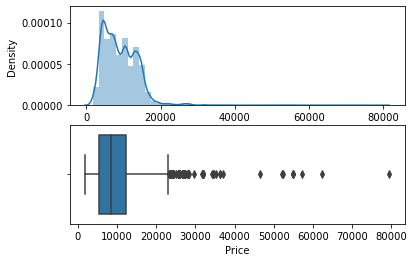

In [844]:
plt.figure(figsize=(30, 20))
plot(train, 'Price')

In [845]:
train['Price'] = np.where(train['Price'] >= 40000,
                          train['Price'].median(), train['Price'])

<Figure size 2160x1440 with 0 Axes>

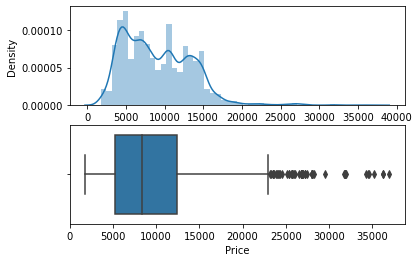

In [846]:
plt.figure(figsize=(30, 20))
plot(train, 'Price')

In [847]:
train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897.0,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662.0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882.0,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218.0,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302.0,3,1,16,50,21,35,4,45


In [849]:
train = train[['Total_Stops', 'Route_1', 'Route_2',
              'Route_3', 'Route_4', 'Route_5', 'Air India', 'GoAir', 'IndiGo',
               'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
               'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
               'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
               'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi',
               'Journey_day', 'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
               'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
               'Duration_mins', 'Price']]

In [850]:
train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,...,Mumbai,Cochin,Delhi,Delhi,Hyderabad,Kolkata,Kolkata,New Delhi,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Price
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50,3897.0
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,5,1,5,50,13,15,7,25,7662.0
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,6,9,9,25,4,25,19,0,13882.0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,5,12,18,5,23,30,5,25,6218.0
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45,13302.0


In [851]:
# Separating the independent & dependent variables
x = train.iloc[:, :-1]
y = train.iloc[:, -1]

In [852]:
x

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,...,Kolkata,Mumbai,Cochin,Delhi,Delhi,Hyderabad,Kolkata,Kolkata,New Delhi,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,2,5,29,13,5,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4,9,19,55,22,25,2,30
10679,0,2,5,29,13,5,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,27,4,20,45,23,20,2,35
10680,0,0,13,29,13,5,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,27,4,8,20,11,20,3,0
10681,0,0,13,29,13,5,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,3,1,11,30,14,10,2,40


In [853]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [855]:
x.dtypes

Total_Stops                          int64
Route_1                              int32
Route_2                              int32
Route_3                              int32
Route_4                              int32
Route_5                              int32
Air India                            uint8
GoAir                                uint8
IndiGo                               uint8
Jet Airways                          uint8
Jet Airways Business                 uint8
Multiple carriers                    uint8
Multiple carriers Premium economy    uint8
SpiceJet                             uint8
Trujet                               uint8
Vistara                              uint8
Vistara Premium economy              uint8
Chennai                              uint8
Delhi                                uint8
Delhi                                uint8
Kolkata                              uint8
Kolkata                              uint8
Mumbai                               uint8
Cochin     

In [856]:
y.dtypes

dtype('float64')

In [857]:
# Feature Selection using using Information Gain
mutual_info_classif(x, y)

array([2.14922498e+00, 2.01429083e+00, 2.75594974e+00, 2.26331426e+00,
       1.50988499e+00, 7.44828341e-01, 7.58951972e-01, 1.03735805e-01,
       6.76619926e-01, 9.18548034e-01, 0.00000000e+00, 5.77967032e-01,
       7.45440540e-04, 3.12814137e-01, 0.00000000e+00, 2.31648412e-01,
       1.33848381e-02, 1.61676664e-01, 1.53748474e+00, 3.94276074e-01,
       8.78924471e-01, 1.64928253e-01, 2.82874731e-01, 1.54043928e+00,
       1.52583345e+00, 4.20182453e-01, 2.91906226e-01, 8.71251867e-01,
       1.70560844e-01, 3.79173485e-01, 1.09785286e+00, 8.35476227e-01,
       1.41172757e+00, 1.21518683e+00, 1.83776041e+00, 1.50928101e+00,
       1.79138744e+00, 1.10003295e+00])

In [858]:
feature = pd.DataFrame(mutual_info_classif(x, y), index=x.columns)
feature.columns = ['Feature']
feature.sort_values(by='Feature', ascending=False)

,Feature
Route_2,2.762148
Route_3,2.277903
Total_Stops,2.151238
Route_1,2.058689
Arrival_Time_hour,1.830001
Duration_hours,1.760770
Cochin,1.567260
Delhi,1.558451
Delhi,1.553408
Arrival_Time_minute,1.547429


In [859]:
# Dataset split into train and test data
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8, test_size=0.2, random_state=42)

In [860]:
# Function to run various models
def predict(ml_model, dump):
    model = ml_model.fit(x_train, y_train)
    print('Training score : {}'.format(model.score(x_train, y_train)))
    y_prediction = model.predict(x_test)
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    r2_score = metrics.r2_score(y_test, y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:', metrics.mean_absolute_error(y_test, y_prediction))
    print('MSE:', metrics.mean_squared_error(y_test, y_prediction))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))
    sns.distplot(y_test-y_prediction)

Training score : 0.6178952688316259
predictions are: 
 [12669.14533093  8345.22823088  9634.64869684 ...  7066.155304
 10884.48027909 11790.97935651]


r2 score: 0.606236210480527
MAE: 1963.9712696777256
MSE: 8064192.291889642
RMSE: 2839.752153250287


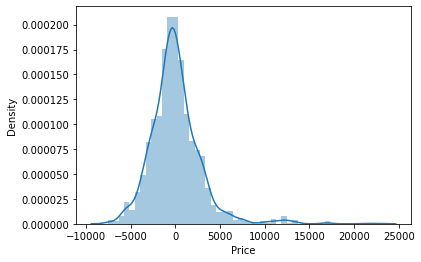

In [861]:
predict(LinearRegression(), 0)

Training score : 0.9656605025637308
predictions are: 
 [16840.  4959.  8610. ...  7006. 13339. 14335.]


r2 score: 0.7484762982024078
MAE: 1314.9004367493371
MSE: 5151147.848660635
RMSE: 2269.6140307683672


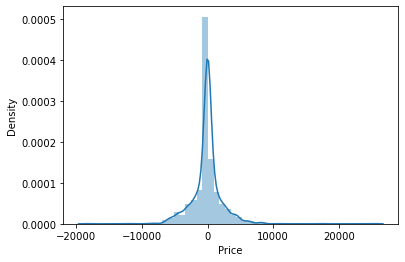

In [862]:
predict(DecisionTreeRegressor(), 0)

Training score : 0.781131118855371
predictions are: 
 [16315.   5158.2  8441.6 ...  6471.8  7140.  11467.6]


r2 score: 0.655044860428417
MAE: 1729.9739822180627
MSE: 7064602.311389799
RMSE: 2657.931961392127


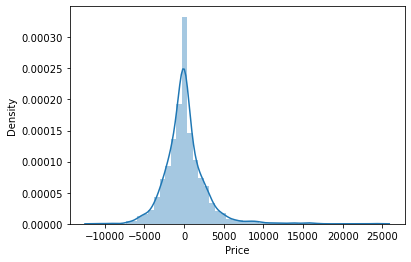

In [863]:
predict(KNeighborsRegressor(), 0)

Training score : 0.9524130241035963
predictions are: 
 [16711.13        6170.37        8819.61       ...  6754.85
 12895.0375     13080.80254762]


r2 score: 0.8304945840685881
MAE: 1150.9181243842597
MSE: 3471432.124969532
RMSE: 1863.177963848202


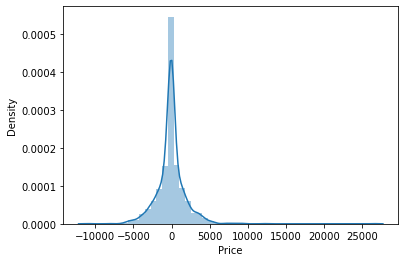

In [864]:
predict(RandomForestRegressor(), 0)

RandomForestRegressor model is the best model much better than LinearRegression, DecisionTreeRegressor and KNeighborsRegressor

In [865]:
# Hyperparameter Tuning

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=6)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num=4)]

# Minimum number of samples required to split a node
min_samples_split = [5, 10, 15, 100]

# Creating the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split
}

In [866]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [868]:
# Initializing the estimator
reg_rf = RandomForestRegressor()
# Random search of parameters, using 5 fold cross validation
rf_random = RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid,
                               scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)

In [869]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_split=100, n_estimators=760; total time=   3.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=100, n_estimators=760; total time=   3.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=100, n_estimators=760; total time=   3.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=100, n_estimators=760; total time=   3.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=100, n_estimators=760; total time=   5.5s
[CV] END max_depth=21, max_features=sqrt, min_samples_split=15, n_estimators=980; total time=  10.1s
[CV] END max_depth=21, max_features=sqrt, min_samples_split=15, n_estimators=980; total time=  10.2s
[CV] END max_depth=21, max_features=sqrt, min_samples_split=15, n_estimators=980; total time=  11.7s
[CV] END max_depth=21, max_features=sqrt, min_samples_split=15, n_estimators=980; total time=   9.8s
[CV] END max_depth=21, max_fea

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [871]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 15,
 'max_features': 'auto',
 'max_depth': 21}

In [872]:
prediction = rf_random.predict(x_test)

<AxesSubplot:xlabel='Price', ylabel='Density'>

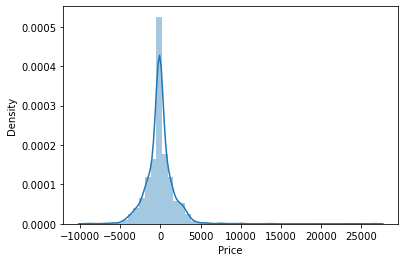

In [873]:
sns.distplot(y_test-prediction)

In [874]:
metrics.r2_score(y_test, prediction)

0.8519199947443622

In [875]:
print('MAE', metrics.mean_absolute_error(y_test, prediction))
print('MSE', metrics.mean_squared_error(y_test, prediction))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE 1104.773923538658
MSE 3032644.617786617
RMSE 1741.4489994790595
